In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL  # image processing a method to perform some operations on an image, in order to get an enhanced image or to extract some useful information from it 
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_dir = "B:\CNN\Train_Dataset"
train_datagen = ImageDataGenerator(validation_split=0.2) 

train_generator = train_datagen.flow_from_directory( data_dir,
                                                     target_size=(32,32),
                                                     batch_size=32,
                                                     shuffle=True,
                                                     class_mode='categorical',
                                                     subset='training')

validation_datagen = ImageDataGenerator(validation_split=0.2)

validation_generator =  validation_datagen.flow_from_directory( data_dir,
                                                                target_size=(32,32),
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                subset='validation')   

Found 38400 images belonging to 2 classes.
Found 9600 images belonging to 2 classes.


In [3]:
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
#    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation='softmax')
])

In [4]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [22]:
# tf.keras.metrics.CategoricalAccuracy(name='val_categorical_accuracy'),tf.keras.metrics.Precision(name='val_precision'), tf.keras.metrics.Recall(name='val_recall')])

In [5]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [6]:
history = cnn_model.fit(train_generator,validation_data=validation_generator,epochs=10)

Epoch 1/10
1200/1200 [==============================] - 153s 127ms/step - loss: 0.5836 - categorical_accuracy: 0.9107 - precision: 0.9107 - recall: 0.9107 - val_loss: 0.2690 - val_categorical_accuracy: 0.8920 - val_precision: 0.8920 - val_recall: 0.8920
Epoch 2/10
1200/1200 [==============================] - 145s 121ms/step - loss: 0.0733 - categorical_accuracy: 0.9758 - precision: 0.9758 - recall: 0.9758 - val_loss: 0.2658 - val_categorical_accuracy: 0.9026 - val_precision: 0.9026 - val_recall: 0.9026
Epoch 3/10
1200/1200 [==============================] - 146s 121ms/step - loss: 0.0527 - categorical_accuracy: 0.9836 - precision: 0.9836 - recall: 0.9836 - val_loss: 0.2305 - val_categorical_accuracy: 0.9280 - val_precision: 0.9280 - val_recall: 0.9280
Epoch 4/10
1200/1200 [==============================] - 147s 122ms/step - loss: 0.0464 - categorical_accuracy: 0.9857 - precision: 0.9857 - recall: 0.9857 - val_loss: 0.4223 - val_categorical_accuracy: 0.8939 - val_precision: 0.8939 - val

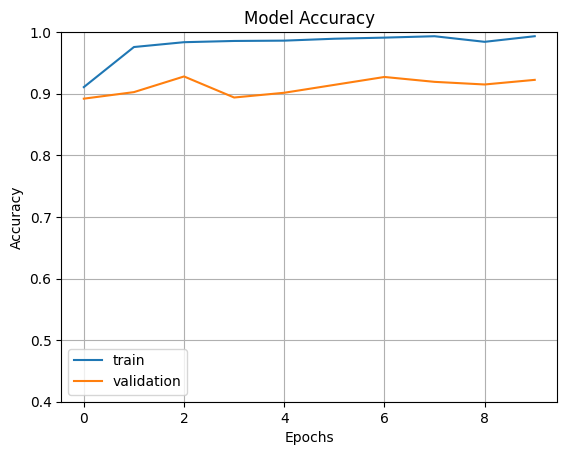

In [8]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Text(0.5, 0, 'Epochs')

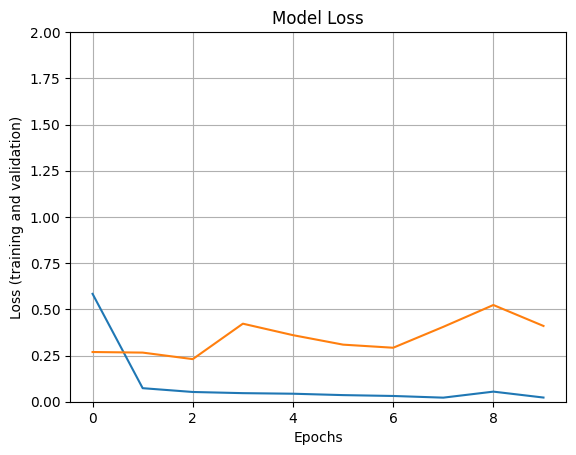

In [9]:
fig2 = plt.gcf()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylim([0,2])
plt.grid()
plt.title('Model Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Epochs")

In [10]:
cnn_model.save("cnn_driver_drowsiness_detection.h5")

In [36]:
# testing model

In [48]:
import cv2
img_height, img_width = 32,32
image=cv2.imread("B:\CNN\Test_Dataset\O_Eyes\s0012_04912_0_0_1_0_0_03.png")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

In [49]:
import cv2
img_height, img_width = 32,32
image=cv2.imread("B:\CNN\Test_Dataset\O_Eyes\s0012_04912_0_0_1_0_0_03.png")
print(image.shape)
r_eye = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
print(r_eye.shape)
r_eye = cv2.resize(r_eye, (img_height,img_width))
print(r_eye.shape)
#r_eye= r_eye/255
r_eye=  r_eye.reshape((-1, 32, 32, 3))
print(r_eye.shape)
#r_eye = np.expand_dims(r_eye,axis=0)
pred=cnn_model.predict(r_eye)

(79, 79, 3)
(79, 79, 3)
(32, 32, 3)
(1, 32, 32, 3)
1/1 [==============================] - 0s 16ms/step


In [50]:
np.argmax(pred)

1

In [51]:
import cv2
img_height, img_width = 32,32
image=cv2.imread("B:\CNN\Test_Dataset\O_Eyes\s0012_04912_0_0_1_0_0_03.png")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

In [52]:
pred=cnn_model.predict(image)

1/1 [==============================] - 0s 16ms/step


In [53]:
output_class=np.argmax(pred)
print("The predicted class is", output_class)

The predicted class is 1


In [54]:
if output_class == 0:
    class_label = 'drowsy'
else:
    class_label = 'not drowsy'

print("The driver in the image is predicted to be:", class_label)

The driver in the image is predicted to be: not drowsy


In [55]:
from keras.models import load_model
test_model = load_model("cnn_driver_drowsiness_detection.h5")
pred = np.argmax(test_model.predict(image), axis=-1)
print(pred)

1/1 [==============================] - 0s 51ms/step
[1]


In [56]:
# model working 

In [2]:
import os
from twilio.rest import Client

def sms():
    client = Client('AC1596f493b473f5cc898b3ef518229ea2', '3e7600418f12686f8f3b5de18b2f8207')
    message = client.messages.create(
                              body='Devansh is drowsy while driving',
                              from_='+15154894927',
                              to='+918273045740'
                          )
    print(message.sid)

SMad0103d04d53b01adf41786a74abfca8


In [1]:
import cv2
import os
from keras.models import load_model
import numpy as np
# from pygame import mixer
import time
import winsound
frequency = 2500
duration = 1000 

# mixer.init()
# sound = mixer.Sound('alarm1.wav')

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
eye_cascadel = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_lefteye_2splits.xml')
eye_cascader = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_righteye_2splits.xml')
# face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# leye = cv2.CascadeClassifier('haarcascade_lefteye_2splits.xml')
# reye = cv2.CascadeClassifier('haarcascade_righteye_2splits.xml')

lbl=['Drowsy!','Awake!']

model = load_model("cnn_driver_drowsiness_detection.h5")
path = os.getcwd()
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
count=0
score=0
thicc=2
rpred=[99]
lpred=[99]

while(True):
    ret, frame = cap.read()
    height,width = frame.shape[:2] 

    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    faces = faceCascade.detectMultiScale(gray,minNeighbors=5,scaleFactor=1.1,minSize=(25,25))
    left_eye = eye_cascadel.detectMultiScale(gray)
    right_eye =  eye_cascader.detectMultiScale(gray)

    cv2.rectangle(frame, (0,height-60) , (200,height) , (0,0,0) , thickness=cv2.FILLED )

    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y) , (x+w,y+h) , (0,255,0) , 1 )

    for (x,y,w,h) in right_eye:
        r_eye=frame[y:y+h,x:x+w]
        count=count+1
        r_eye = cv2.cvtColor(r_eye,cv2.COLOR_BGR2RGB)
        r_eye = cv2.resize(r_eye,(32,32))
        r_eye=  r_eye.reshape((-1, 32, 32, 3))

        # predict_classes is depricated
        #rpred = model.predict_classes(r_eye) 
        
        rpred = np.argmax(model.predict(r_eye), axis=-1)
        if(rpred[0]==1):
            lbl='Awake!' 
        if(rpred[0]==0):
            lbl='Drowsy!'
        break

    for (x,y,w,h) in left_eye:
        l_eye=frame[y:y+h,x:x+w]
        count=count+1
        l_eye = cv2.cvtColor(l_eye,cv2.COLOR_BGR2RGB)  
        l_eye = cv2.resize(l_eye,(32,32))
        l_eye=l_eye.reshape((-1, 32, 32, 3))
        
        # predict_classes is depricated
        #lpred = model.predict_classes(l_eye)
        
        lpred = np.argmax(model.predict(l_eye), axis=-1)
        if(lpred[0]==1):
            lbl='Awake!'   
        if(lpred[0]==0):
            lbl='Drowsy!'
        break

    if(rpred[0]==0 and lpred[0]==0):
        score=score+1
        cv2.putText(frame,"Drowsy!",(0,height-20), font, 1,(0,0,255),1,cv2.LINE_AA)
    # if(rpred[0]==1 or lpred[0]==1):
    else:
        score=score-1
        cv2.putText(frame,"Awake!",(0,height-20), font, 1,(0,255,0),1,cv2.LINE_AA)
    
        
    if(score<0):
        score=0   
    cv2.putText(frame,'Score:'+str(score),(100,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    if(score>24):
        sms()
        #person is feeling sleepy so we beep the alarm
        cv2.imwrite(os.path.join(path,'image.jpg'),frame)
        try:
#             sound.play()
            winsound.Beep(frequency, duration)
            
        except:  # isplaying = False
            pass
        if(thicc<16):
            thicc= thicc+2
        else:
            thicc=thicc-2
            if(thicc<2):
                thicc=2
        cv2.rectangle(frame,(0,0),(width,height),(0,0,255),thicc) 
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


In [52]:
import cv2
print(cv2.__file__)
print(cv2.data.haarcascades)

C:\Users\Jai Vadula\AppData\Local\Programs\Python\Python310\lib\site-packages\cv2\__init__.py
C:\Users\Jai Vadula\AppData\Local\Programs\Python\Python310\lib\site-packages\cv2\data\
